# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# All Chromosomes

# Modules

In [60]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# from sklearn.externals import joblib！！！
import joblib
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

In [61]:
iterationNumber = 0

# 1. Read the File to Acquire the Filename

In [63]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_09': {'0': ['F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A15.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A21.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A17.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A22.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A6.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.14~A40.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.2~A23.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.2~A48.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.3~A39.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.4~A36.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78058.3~A19.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78058.3~A2.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78058.3~A26.K_9R.png',
   'F:

In [64]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)

In [65]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_09': ['F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A15.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A21.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.12~A30.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A1.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A17.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A22.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.13~A6.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.14~A40.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.2~A23.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.2~A48.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.3~A39.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78034.4~A36.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\78058.3~A19.K_9R.png',
  'F:\\MyProject\\Mach

# Iteration Starts Here:

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [70]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  0
chr_09
   Train: 
        78034.12~A15.K_9R.png
        78034.12~A21.K_9R.png
        78034.13~A17.K_9R.png
        78034.13~A22.K_9R.png
        78034.13~A6.K_9R.png
        78034.14~A40.K_9R.png
        78034.2~A23.K_9R.png
        78034.2~A48.K_9R.png
        78034.3~A39.K_9R.png
        78034.4~A36.K_9R.png
        78058.3~A19.K_9R.png
        78058.3~A2.K_9R.png
        78058.3~A26.K_9R.png
        78058.4~A15.K_9R.png
        78058.4~A48.K_9R.png
        78058.4~A8.K_9R.png
        78142.12~A27.K_9R.png
        78142.13~A20.K_9R.png
        78142.2~A13.K_9R.png
        78142.4~A44.K_9R.png
        78220.1~A45.K_9R.png
        78220.2~A21.K_9R.png
        78220.3~A23.K_9R.png
        78220.4~A17.K_9R.png
        78220.4~A38.K_9R.png
        78230.13~A12.K_9R.png
        78230.2~A1.K_9R.png
        78230.3~A5.K_9R.png
        78230.4~A17.K_9R.png
        78451.12~A1.K_9R.png
        78451.12~A38.K_9R.png
        78451.2~A16.K_9R.png
        78451.3~A37.K_9R.png
   

### 3.1.1. Helper Functions

In [72]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [73]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [76]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

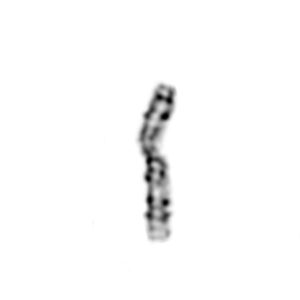

In [77]:
image['chr_09'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [80]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

#### Train 2D to 1D

In [82]:
data_flat = {}

for chrNo in data.keys():
    data_flat[chrNo] = []
    for case in data[chrNo]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        data_flat[chrNo].append(case_flat)

In [83]:
x_train_list = []
y_train_list = []

for y, x in data_flat.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [86]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [88]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

#### Test 2D to 1D

In [90]:
data_flat = {}

for chrNo in data.keys():
    data_flat[chrNo] = []
    for case in data[chrNo]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        data_flat[chrNo].append(case_flat)

In [91]:
x_test_list = []
y_test_list = []

for y, x in data_flat.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [93]:
chromConvert = {
               'chr_09': 0,                
                'chr_9_inversion': 1
               }

In [94]:
chromConvert_reverse = {0: 'chr_09',
                        1: 'chr_9_inversion'
               }

In [95]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [97]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [98]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [99]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [100]:
len(X_train)

80

In [101]:
X_train[0].shape

(90000,)

## 3.2. Support Vector Machine

In [103]:
start = time.time()



clf = svm.SVC(kernel='linear', decision_function_shape='ovo')
clf.fit(X_train, y_train)

end = time.time()

In [104]:
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[-1.25360876e-19 -1.25360876e-19 -1.25360876e-19 ...  1.65878588e-07
   1.81208714e-07 -2.52444379e-07]]
b =  [3.47334647]
Indices of support vectors =  [ 1  2  4  6  7  8 11 12 13 14 15 16 17 18 20 22 24 25 26 27 30 31 32 33
 35 38 41 42 45 46 47 50 51 53 54 56 57 58 69 70 74 76 77]
Support vectors =  [[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
Number of support vectors for each class =  [26 17]
Coefficients of the support vector in the decision function =  [[1.99027939e-07 3.04835138e-08 2.14545032e-08 3.92190300e-08
  5.86432818e-08 1.05517758e-07 7.54474670e-08 1.06076086e-08
  6.46698216e-08 1.51823791e-07 3.92971473e-08 1.72372259e-07
  5.76436771e-08 1.43152676e-07 3.12849229e-08 7.23360238e-08
  1.18497180e-07 1.01984725e-07 9.16180003e-09 1.14193449e-07
  2.31620022e-08 2.05952833e-07 9.198

## 3.8 Save the Model

In [106]:
c = joblib.dump(clf, 'model_allClass_svm_iteration_'+str(iterationNumber))
print(c)

['model_allClass_svm_iteration_0']


## 3.9 Load the Model

In [108]:
model_reload = joblib.load('model_allClass_svm_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.1. Accuracy

In [111]:
acc = model_reload.score(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.900


In [112]:
len(X_test)

20

In [113]:
y_predict = model_reload.predict(X_test)

In [114]:
len(y_predict)

20

# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [116]:
label = ['chr_09', 'chr_9_inversion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.2. Classification Report

In [118]:
performanceReport = classification_report(y_test, y_predict, target_names=label_convert)

# Change here for different iteration!!!!!

print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.90      0.90      0.90        10
chr_9_inversion       0.90      0.90      0.90        10

       accuracy                           0.90        20
      macro avg       0.90      0.90      0.90        20
   weighted avg       0.90      0.90      0.90        20



### 3.10.3. Confusion Matrix

In [120]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_05_KaryoType_SVM' + str(iterationNumber) + '.csv')
confusion

,chr_09,chr_9_inversion
chr_09,9,1
chr_9_inversion,1,9


### 3.10.4 Rate of Confusion Matrix

In [122]:
subtotal = [0] * 2 
for item in y_test:
    subtotal[item] = subtotal[item] + 1

In [123]:
cm_r = []
for i in range(2):
    cm_r.append(cm[i]/subtotal[i])

In [124]:
cm_array = np.array(cm_r)

In [125]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Rate_KaryoType_SVM' + str(iterationNumber) + '.csv')
confusion_r

,chr_09,chr_9_inversion
chr_09,0.9,0.1
chr_9_inversion,0.1,0.9


#### Heat Map: Number

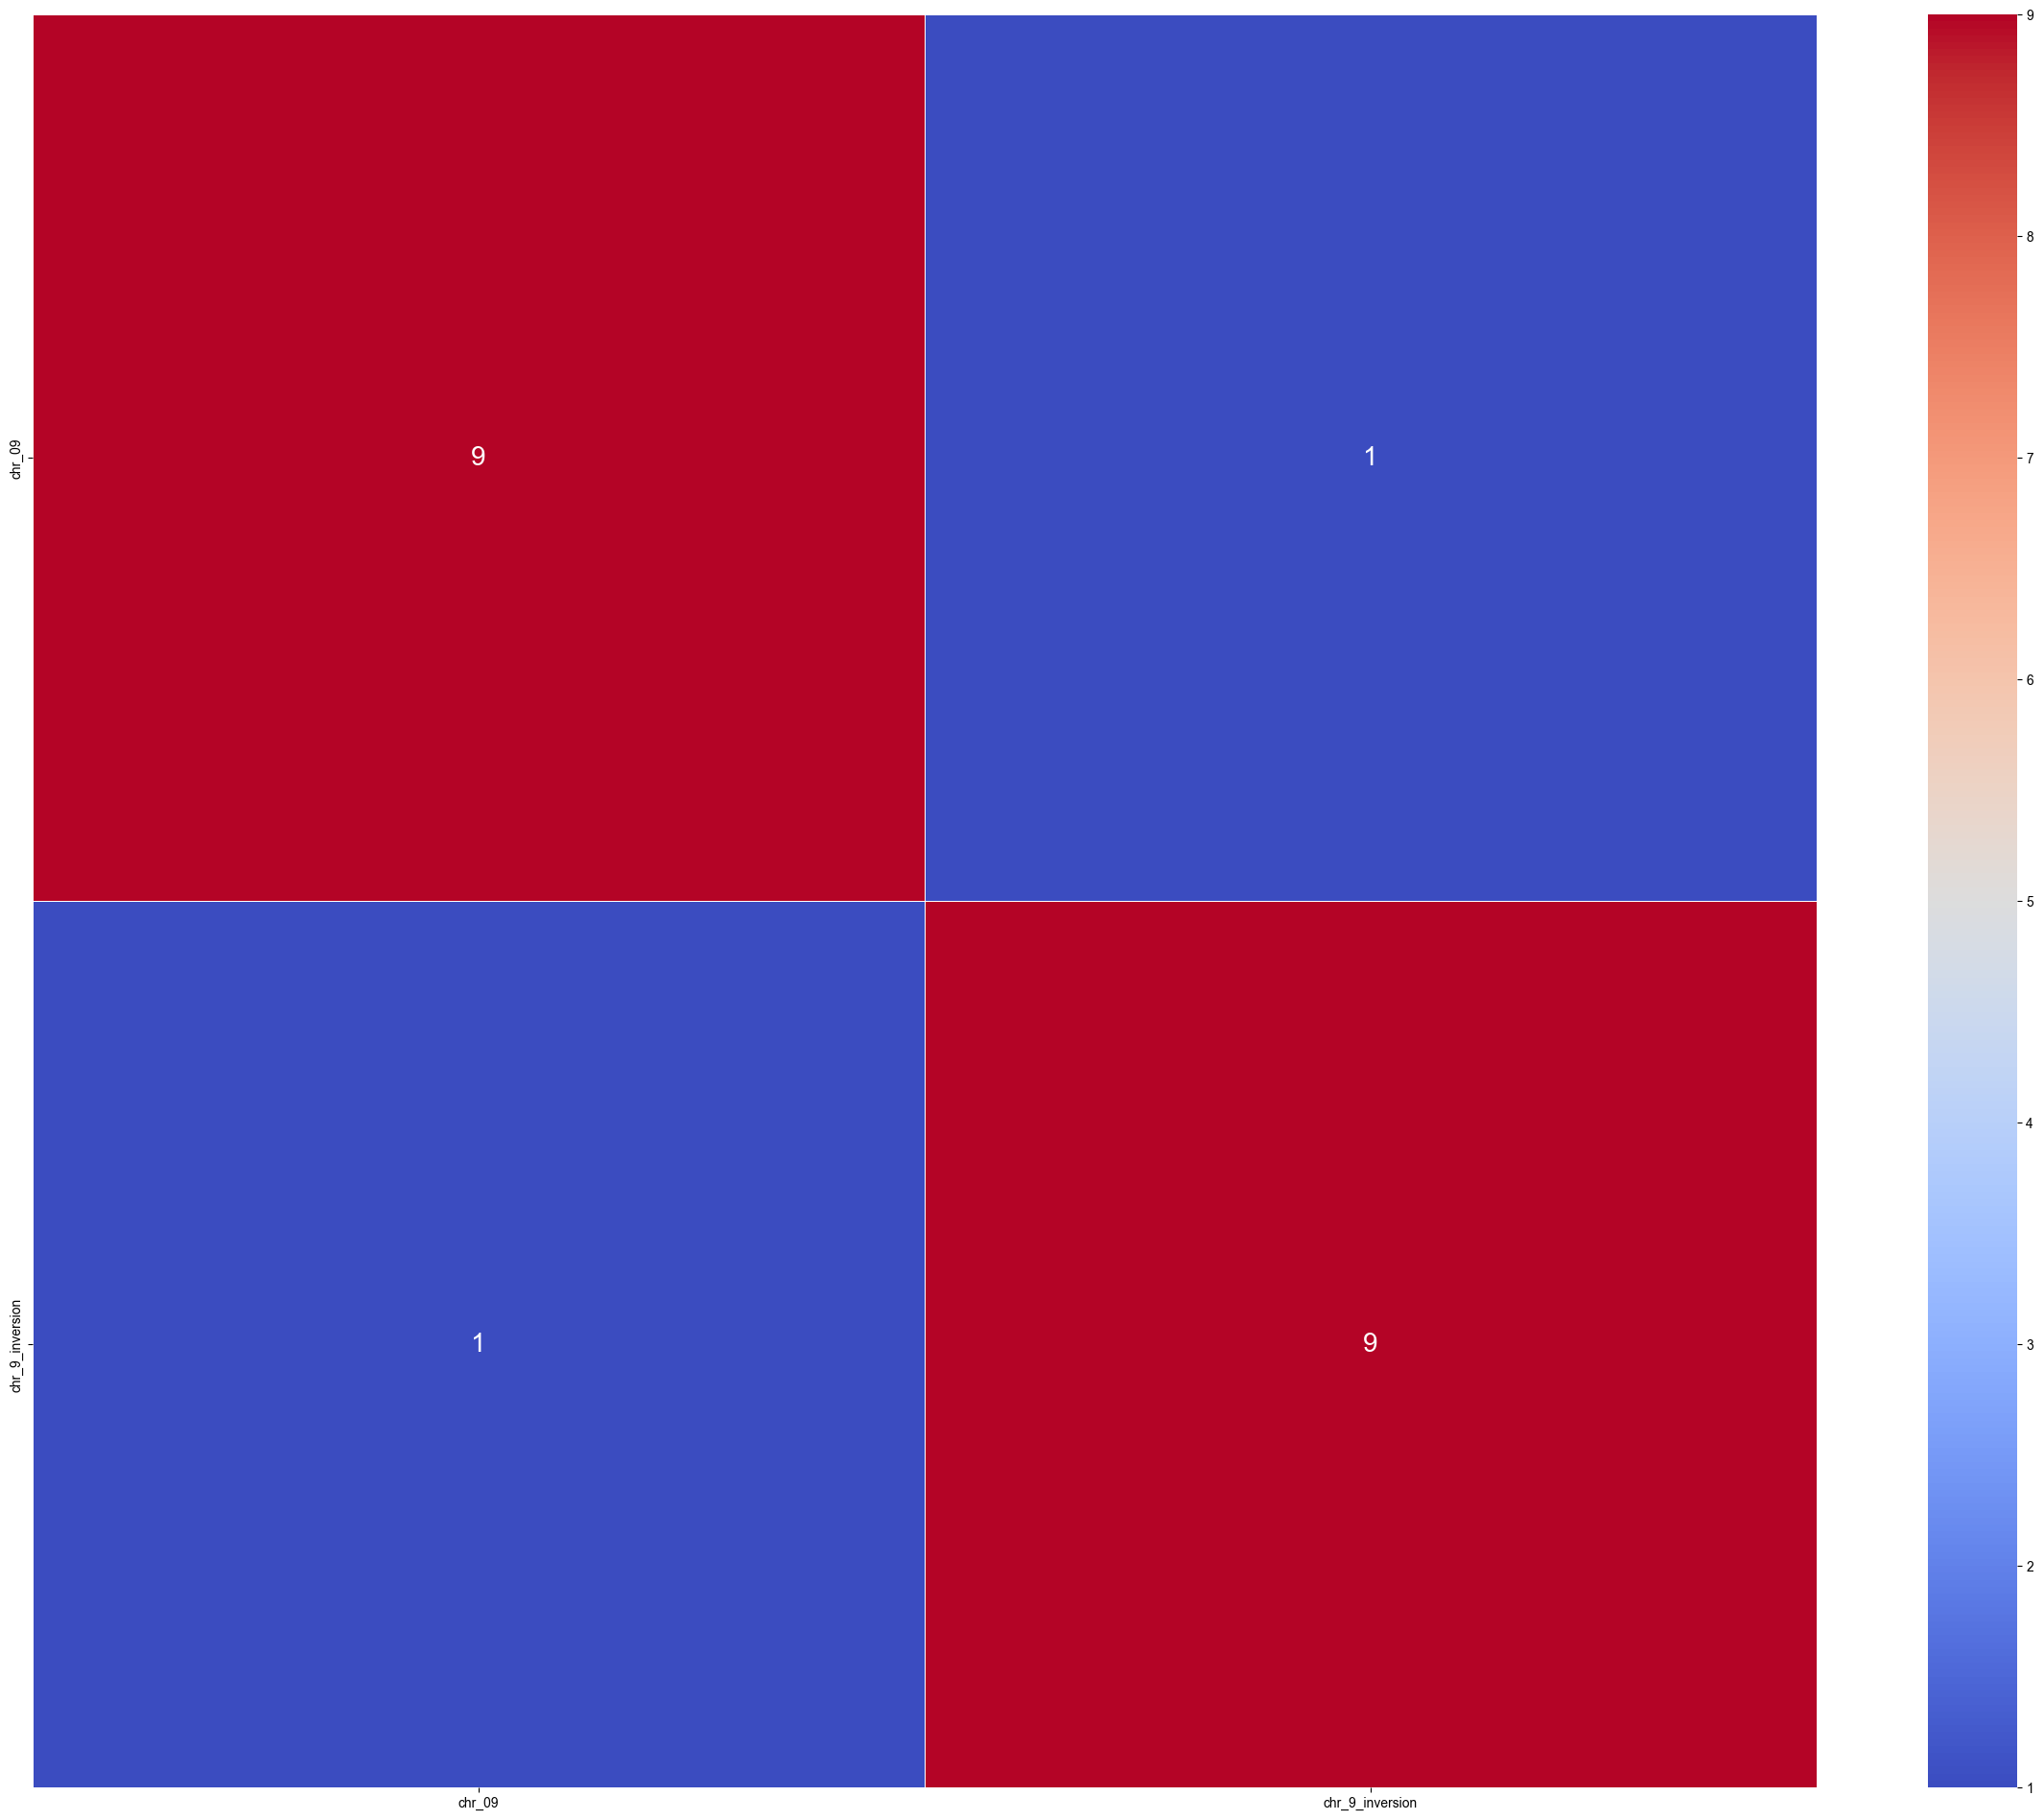

In [127]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

#### Heat Map: Rate (important!!!)

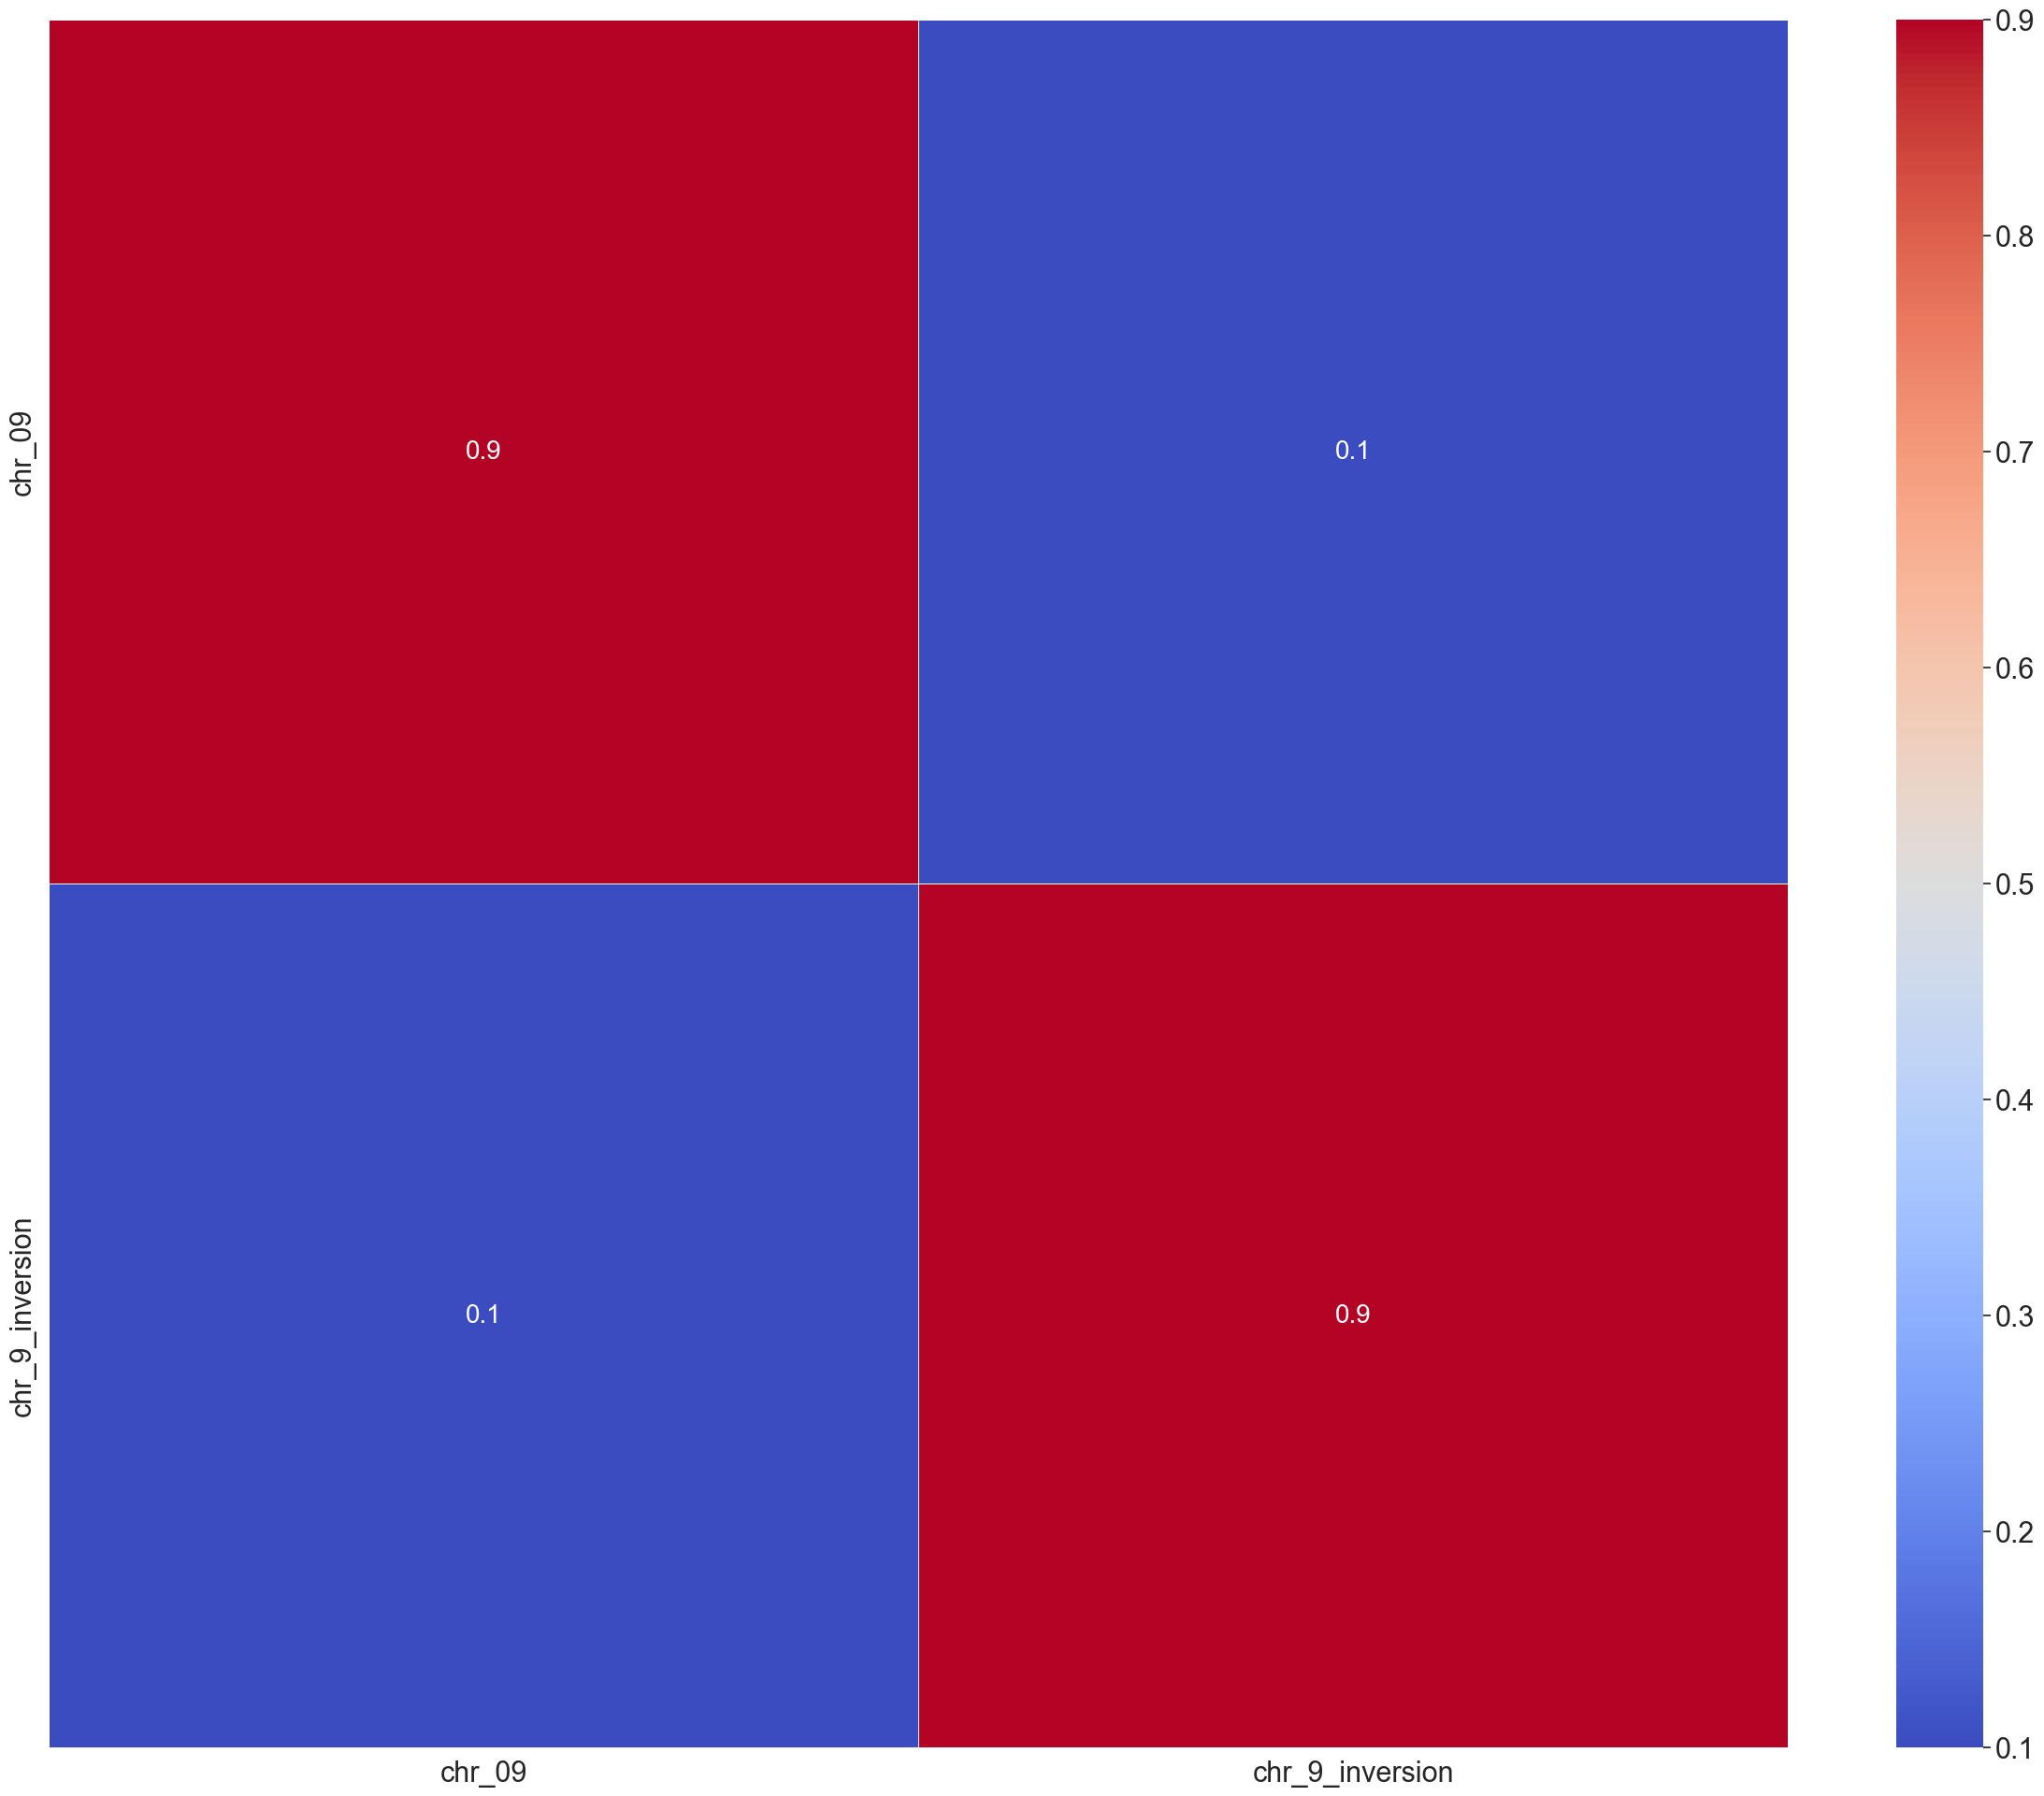

In [129]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [130]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Iteration_' + str(iterationNumber) + '.png', dpi=400)

In [131]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Rate_Iteration_' + str(iterationNumber) + '.png', dpi=400)

# Results

In [133]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.900


In [134]:
print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.90      0.90      0.90        10
chr_9_inversion       0.90      0.90      0.90        10

       accuracy                           0.90        20
      macro avg       0.90      0.90      0.90        20
   weighted avg       0.90      0.90      0.90        20



In [135]:
type(performanceReport)

str

In [136]:
confusion

,chr_09,chr_9_inversion
chr_09,9,1
chr_9_inversion,1,9


## Export to a text file

In [138]:
file_report = open('Results_'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()